# TP à rendre 2 Egalisation d'histogrammes
Dans ce TP, nous aimerions améliorer le contraste d'images par deux méthodes. Une méthode d'expansion de la dynamique, et une méthode d'égalisaton d'histogramme. La première image3 à traiter est dans un fichier npy à loader. Le reste des images sont dans le même dossier. 

In [60]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Lire et afficher l'image3 à utiliser

In [4]:
# 64 size image3
images = [np.genfromtxt('image.csv', delimiter=';'),cv2.imread("Fig0208(a).tif", cv2.IMREAD_GRAYSCALE),cv2.imread("Fig0228(a).tif", cv2.IMREAD_GRAYSCALE)]
imagesBases = [images[0],cv2.imread("Fig0208(a).tif"),cv2.imread("Fig0228(a).tif")]

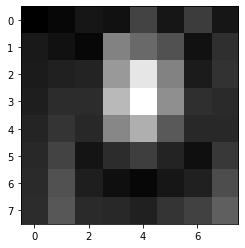

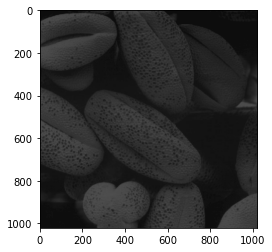

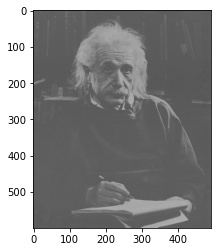

In [47]:
for image in imagesBases:
    plt.imshow(image,cmap='gray')
    plt.show()


# Calculer les métriques sur l'image3
1.	Calculer la moyenne de luminance de l’image.
2.	Donner la dynamique de l’image (intervalle [Lmin, Lmax]).
3.	Calculer le contraste de l’image.
4.	Calculer l’écart type des niveaux de gris de l’image.


In [19]:
# Moyenne de luminance
luminanceMeans = []
for image in images:
    luminanceMeans.append(image.mean())
print("Moyenne de luminance",luminanceMeans)

Moyenne de luminance [76.078125, 38.759796477690344, 102.35628571428572]


In [20]:
# image3 Dynamic
Lmin, Lmax = [],[]
for image in images:
    Lmin.append(image.min())
    Lmax.append(image.max())
print("luminance minimal",Lmin)
print("luminance maximal",Lmax)

luminance minimal [52.0, 13, 74]
luminance maximal [154.0, 83, 178]


In [22]:
# image3 Contrast
contrast = []
for i in range(len(images)):
    contrast.append((Lmax[i] - Lmin[i]) / (Lmax[i] + Lmin[i]))
print("Images Contrast",contrast)

Images Contrast [0.49514563106796117, 0.7291667, 0.41269842]


In [23]:
# Ecart type
Ecart=[]
for image in images:
    Ecart.append(image.std())
print("Ecart type",Ecart)

Ecart type [20.916728269124093, 17.26433206139443, 20.562525833492863]


# Histogramme et histogramme cumulé
5.	Construire l’histogramme de cette image3 ainsi que son histogramme normalisé.
6.	Construire l’histogramme cumulé de cette image3 ainsi que son histogramme cumulé normalisé.

## Histogram

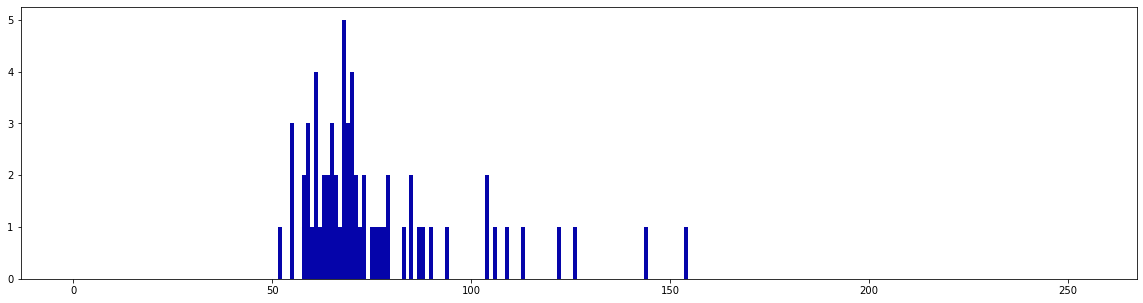

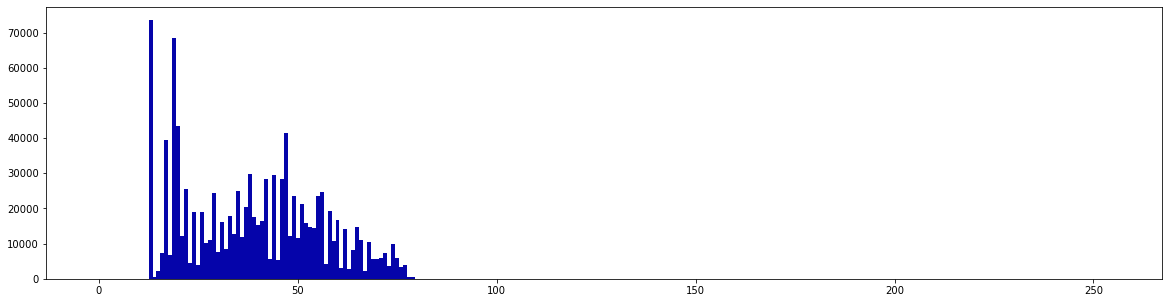

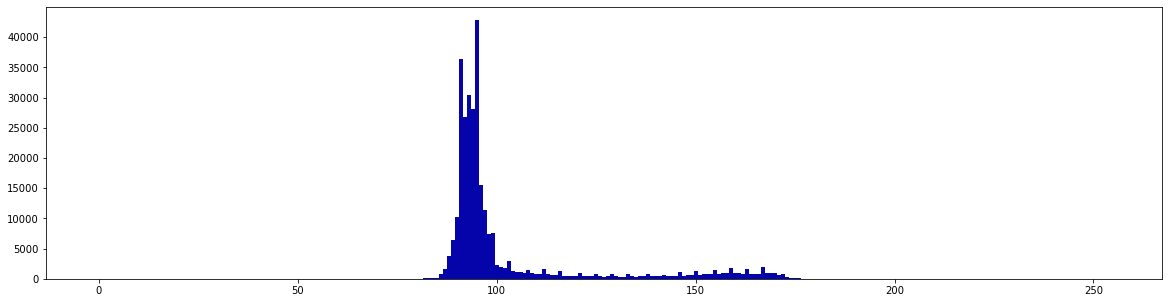

In [26]:
# Histogram
histograms=[]
for image in images:
    hist, edges = np.histogram(image, bins=range(256))
    histogram= { edges[i]:hist[i] for i in range(len(hist))} 
    histograms.append( histogram )   
    plt.figure(figsize=[20,5])
    plt.bar(edges[:-1], list(histogram.values()), width = 1, color='#0504aa')
    plt.show()



In [32]:
Sizes=[]
for image in images:
    w, h = image.shape
    Sizes.append(w * h)
print("Sizes : ",Sizes)


Sizes :  [64, 1042441, 294000]


## Normalized Histogram

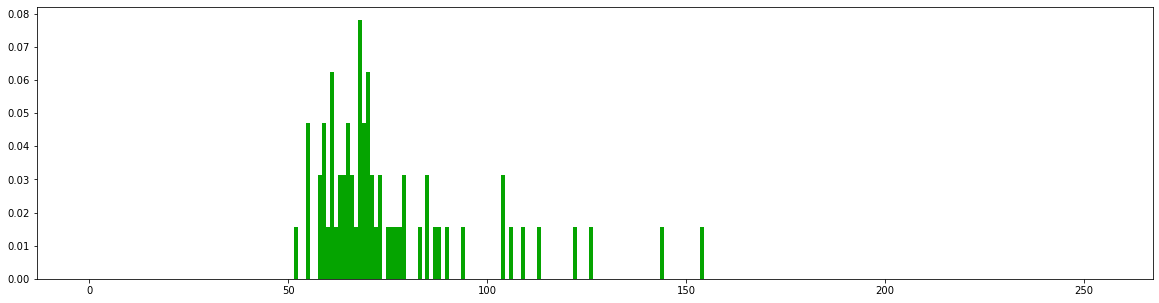

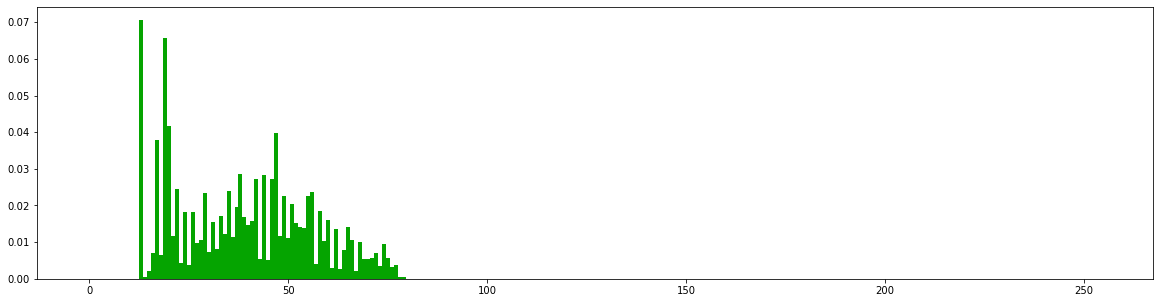

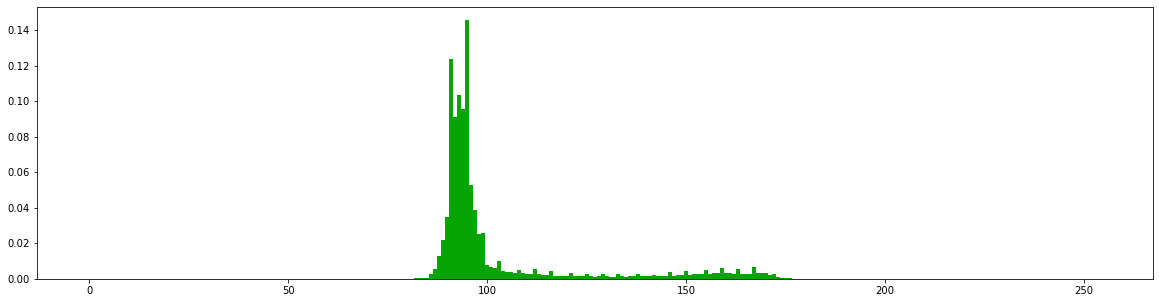

In [33]:
# Normalized Histogram
histogramsN=[]
for i,histogram in enumerate(histograms):
    histogramN = {}
    for key, val in histogram.items():
        histogramN[key] = val/Sizes[i]
    plt.figure(figsize=[20,5])
    plt.bar(edges[:-1], list(histogramN.values()), width = 1, color='#05a400')
    plt.show()
    histogramsN.append(histogramN)

## Cumulated Histogram

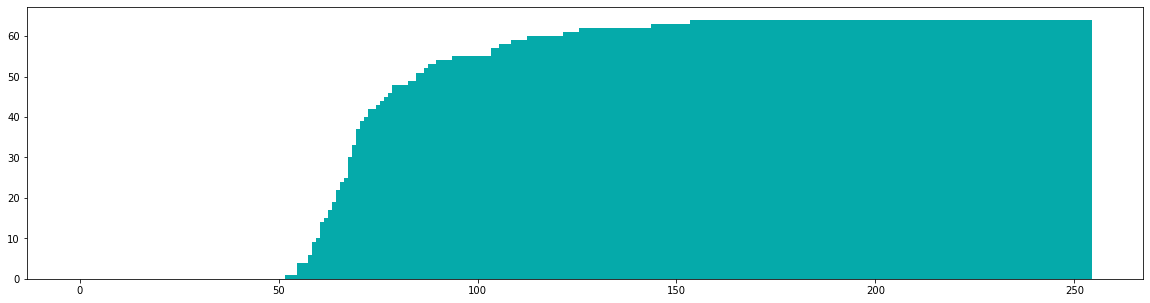

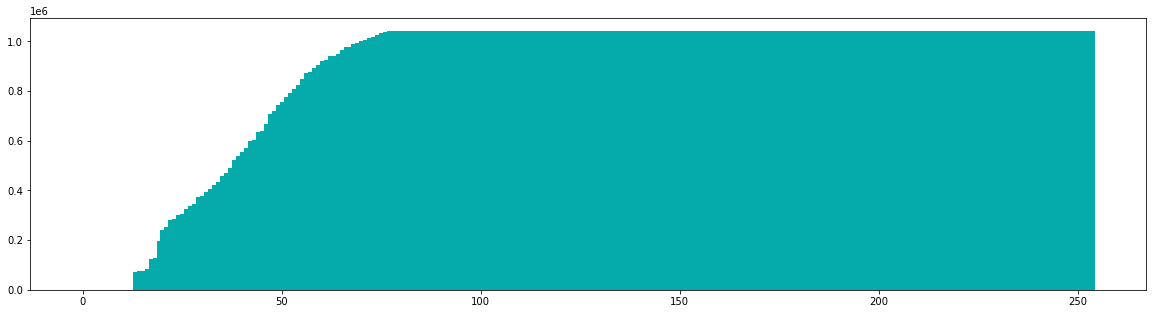

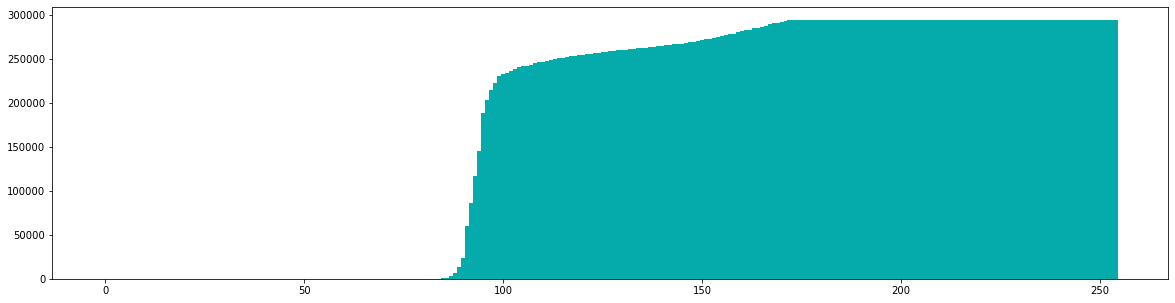

In [36]:
# Cumulated Histogram
histogramsCummule=[]
for histogram in histograms:
    cummule = 0
    histogramCummule = {}
    for key, val in histogram.items():
        cummule += val
        histogramCummule[key] = cummule
    plt.figure(figsize=[20,5])
    plt.bar(edges[:-1], list(histogramCummule.values()), width = 1, color='#05aaaa')
    plt.show()
    histogramsCummule.append(histogramCummule)

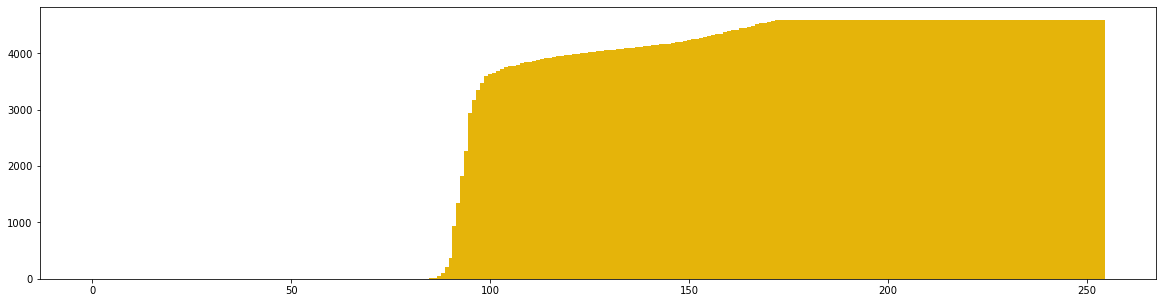

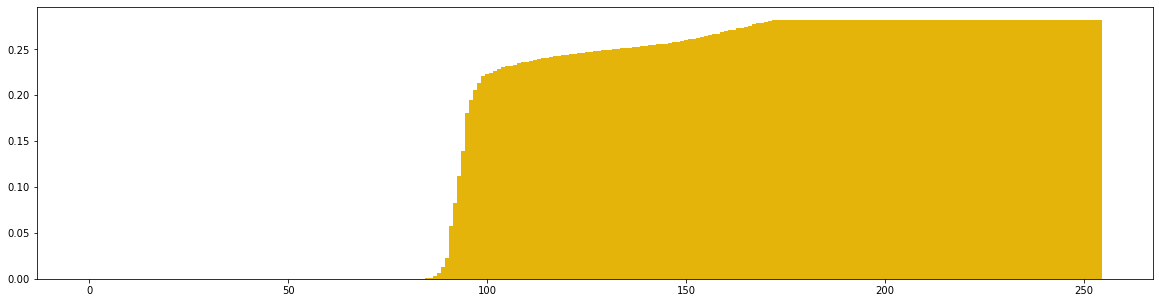

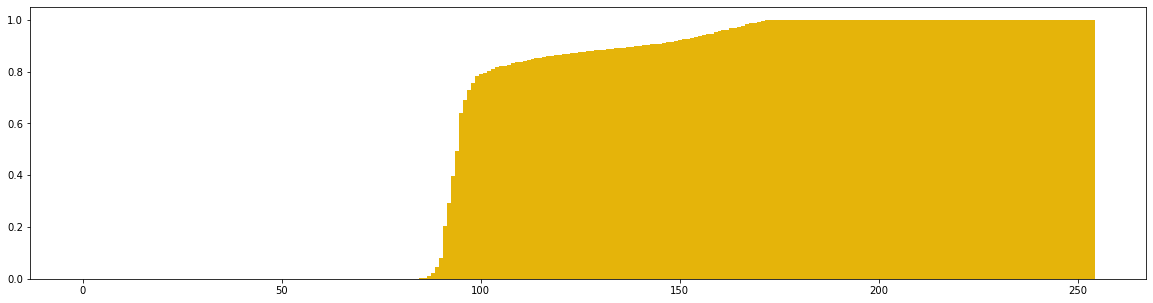

In [37]:
# Cumulated Normalized Histogram
histogramsCummuleN=[]
for i,histogram in enumerate(histograms):
    histogramCummuleN = { key:val/Sizes[i] for key, val in histogramCummule.items()}
    plt.figure(figsize=[20,5])
    plt.bar(edges[:-1], list(histogramCummuleN.values()), width = 1, color='#e5b40a')
    plt.show()
    histogramsCummuleN.append(histogramCummuleN)

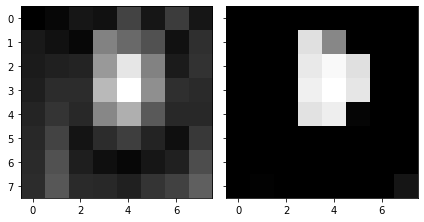

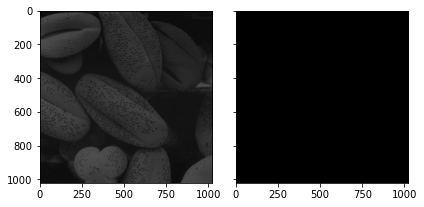

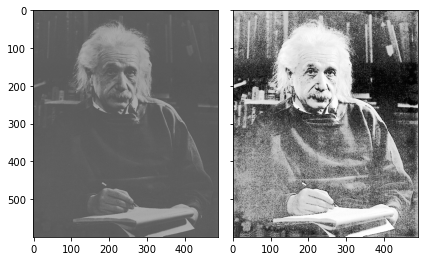

In [71]:
egalisationsImage=[]
for count,image in enumerate(images):
    egalisationImage = image.copy()
    for i, row in enumerate(egalisationImage):
        for j, pixel in enumerate(row):
            egalisationImage[i][j] = np.floor(histogramCummuleN[pixel] * 255)
    fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
    if count>0:
        axs[0].imshow(imagesBases[count],cmap='gray')
    else:
        axs[0].imshow(image,cmap='gray')
    axs[1].imshow(egalisationImage,cmap='gray')
    plt.show()
    egalisationsImage.append(egalisationImage)

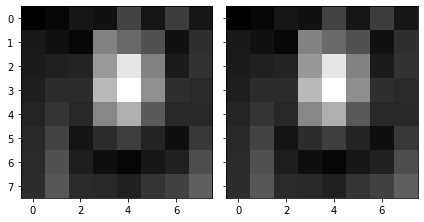

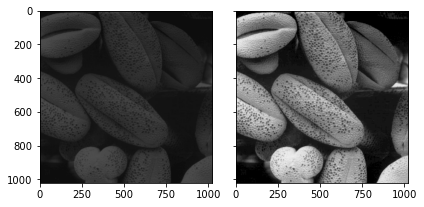

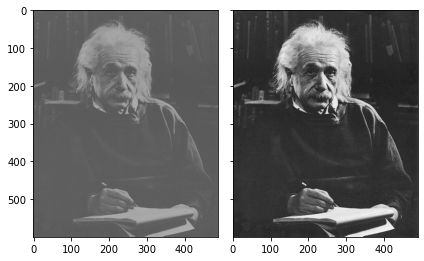

In [72]:
etirementsImage=[]
for count,image in enumerate(images):
    etirementImage = image.copy()
    for i, row in enumerate(etirementImage):
        for j, pixel in enumerate(row):
            etirementImage[i][j] = np.floor(((pixel - Lmin[count]) * 255)/(Lmax[count] - Lmin[count]))
            # etirementImage[i][j] = np.floor(((histogramCummuleN[pixel] - Lmin) * 255)/(Lmax - Lmin))
    fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
    if count>0:
        axs[0].imshow(imagesBases[count])
    else:
        axs[0].imshow(image,cmap='gray')
    axs[1].imshow(etirementImage,cmap='gray')
    plt.show()
    etirementsImage.append(etirementImage)

# Comparer votre implémentation aux fonctions de opencv

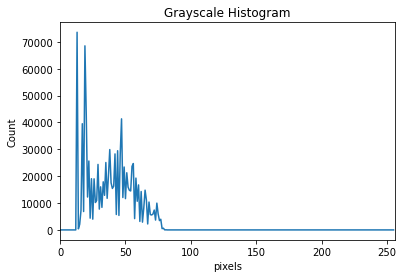

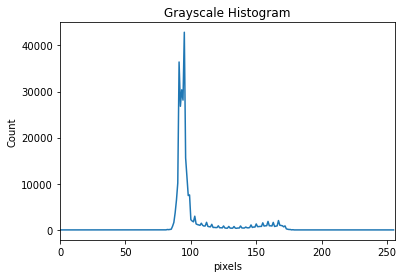

In [70]:
#cv2.calcHist
cv2histograms=[]
for count,image in enumerate(images):
    cv2histogram=None
    if count >0:
        cv2histogram=cv2.calcHist([image], [0], None, [256], [0, 256])
    else:
        continue
    plt.figure()
    plt.title("Grayscale Histogram")
    plt.xlabel("pixels")
    plt.ylabel("Count")
    plt.plot(cv2histogram)
    plt.xlim([0, 256])
    plt.show()
    cv2histograms.append(cv2histogram)

- Expliquer la difference.
- comparer aussi avec les méthodes des autres librairies.

# 7.	Etendre l’histogramme et visualiser l’image résultante.

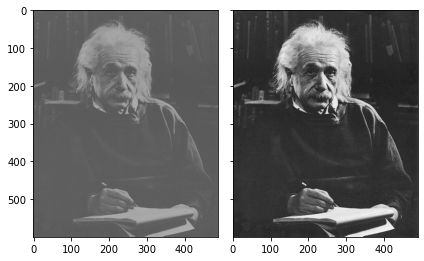

In [123]:
cv2etirementImage = image3.copy()
for i, row in enumerate(cv2etirementImage):
    for j, pixel in enumerate(row):
        cv2etirementImage[i][j] = np.floor(((pixel - Lmin) * 255)/(Lmax - Lmin))
        # cv2etirementImage[i][j] = np.floor(((histogramCummuleN[pixel] - Lmin) * 255)/(Lmax - Lmin))

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].imshow(imageBase3)
axs[1].imshow(etirementImage,cmap='gray')

# 8.	Comparer les histogrammes des deux images ; originale et étendue

(0.0, 256.0)

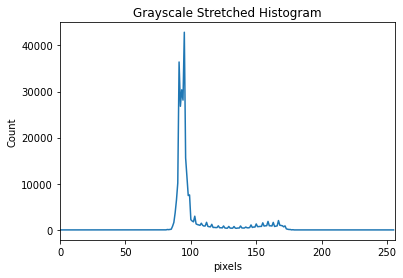

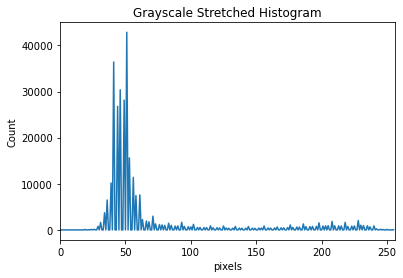

In [139]:

cv2histStretched = cv2.calcHist([cv2etirementImage], [0], None, [256], [0, 256])

plt.figure()
plt.title("Grayscale Stretched Histogram")
plt.xlabel("pixels")
plt.ylabel("Count")
plt.plot(cv2hist)
plt.xlim([0, 256])

plt.figure()
plt.title("Grayscale Stretched Histogram")
plt.xlabel("pixels")
plt.ylabel("Count")
plt.plot(cv2histStretched)
plt.xlim([0, 256])


# Expansion de la dynamique et comparaison avec l'égalisation d'histogramme

## Cumulated Histogram 

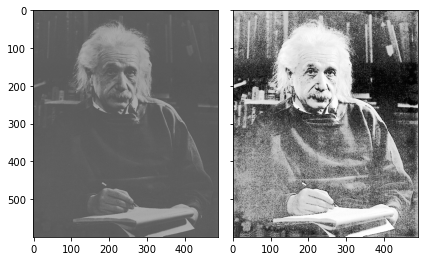

In [113]:
cummule = 0
cv2histCummulatedNorm = np.array(cv2hist)
for idx, val in enumerate(cv2hist):
    cummule += val
    cv2histCummulatedNorm[idx] = cummule / image3.size

cv2egalisationImage = image3.copy()
for i, row in enumerate(cv2egalisationImage):
    for j, pixel in enumerate(row):
        cv2egalisationImage[i][j] = np.floor(cv2histCummulatedNorm[pixel] * 255)

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].imshow(imageBase3,cmap='gray')
axs[1].imshow(cv2egalisationImage,cmap='gray')

# Améliorer le contraste des images données
améliorer le contraste des 3 images envoyées avec les méthodes implémentées precedemment.

# Consignes
Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi à 19h


In [ ]:
# bonne chance
# YEDEK FIH